<a href="https://colab.research.google.com/github/KirolosKhairy/Data-Analysis/blob/main/dz5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 0. Обработка данных

---



##Загрузка и предварительная обработка данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

file_path = 'data_example.csv'
data = pd.read_csv(file_path,
                   sep=",",
                   header=[0,1,2,3],
                   skiprows=1,
                   na_values=['Missing','nan','Offln'],
                   encoding_errors='ignore'
                  )
data

,Name,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
,Units,Unnamed: 1_level_1,degc,degc,degc,Unnamed: 5_level_1,degc,degc,Unnamed: 8_level_1,degc,...,Unnamed: 86_level_1,Unnamed: 87_level_1,Unnamed: 88_level_1,Bar,%,%,%,Bar,degc,Bar
,Digital,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,Sample Rate,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,...,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин,2 мин
0,00:00:00 01/03/2021,0.0,-11.39,7.50,9.11,11.0,-9.39,0.22,11.0,1.78,...,1.0,1.0,3.0,0.60,38.0,0.0,0.0,8.68,-8.22,14.77
1,00:02:00 01/03/2021,11.0,-14.78,7.78,9.11,11.0,-1.39,1.72,11.0,-0.78,...,1.0,3.0,3.0,0.60,59.0,0.0,0.0,8.59,-8.22,14.77
2,00:04:00 01/03/2021,11.0,-1.50,7.78,9.11,11.0,2.00,3.11,11.0,-1.28,...,3.0,3.0,3.0,0.60,81.0,0.0,0.0,10.76,-8.22,14.77
3,00:06:00 01/03/2021,11.0,5.22,7.00,5.22,0.0,3.89,4.22,0.0,-0.28,...,2.0,1.0,3.0,0.60,38.0,0.0,0.0,7.69,-6.00,14.77
4,00:08:00 01/03/2021,0.0,8.22,4.50,-9.28,11.0,-11.78,1.22,11.0,0.72,...,3.0,1.0,3.0,0.60,50.0,0.0,0.0,10.23,-6.00,14.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26146,07:32:00 06/04/2021,0.0,-15.11,8.11,8.22,0.0,-0.61,2.28,11.0,1.22,...,1.0,1.0,3.0,2.97,19.0,0.0,0.0,10.62,5.78,14.77


##Очистка заголовков столбцов

In [4]:
data.columns[:10]

MultiIndex([(                                 'Name', ...),
            ('10CT G PBP -1/+1:   --- EKC состояние', ...),
            (      '10CT G PBP -1/+1:   u09 S5 Темп', ...),
            (    '11CT G OVZ +5/+8:   u69 Sair Темп', ...),
            (      '11CT G OVZ +5/+8:   u09 S5 Темп', ...),
            ('11CT G OVZ +5/+8:   --- EKC состояние', ...),
            (      '12CT G GSR +2/+4:   u09 S5 Темп', ...),
            (    '12CT G GSR +2/+4:   u69 Sair Темп', ...),
            ('12CT G GSR +2/+4:   --- EKC состояние', ...),
            (    '13CT G PBP -1/+1:   u69 Sair Темп', ...)],
           )

In [5]:
data.columns = data.columns.droplevel([1, 2, 3])

In [6]:
data = data.rename(columns={'Name': 'time'})

In [7]:
data.columns[:10]

Index(['time', '10CT G PBP -1/+1:   --- EKC состояние',
       '10CT G PBP -1/+1:   u09 S5 Темп', '11CT G OVZ +5/+8:   u69 Sair Темп',
       '11CT G OVZ +5/+8:   u09 S5 Темп',
       '11CT G OVZ +5/+8:   --- EKC состояние',
       '12CT G GSR +2/+4:   u09 S5 Темп', '12CT G GSR +2/+4:   u69 Sair Темп',
       '12CT G GSR +2/+4:   --- EKC состояние',
       '13CT G PBP -1/+1:   u69 Sair Темп'],
      dtype='object')

Информация о датасете

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26151 entries, 0 to 26150
Data columns (total 96 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   time                                     26151 non-null  object 
 1   10CT G PBP -1/+1:   --- EKC состояние    26145 non-null  float64
 2   10CT G PBP -1/+1:   u09 S5 Темп          26145 non-null  float64
 3   11CT G OVZ +5/+8:   u69 Sair Темп        26143 non-null  float64
 4   11CT G OVZ +5/+8:   u09 S5 Темп          26143 non-null  float64
 5   11CT G OVZ +5/+8:   --- EKC состояние    26143 non-null  float64
 6   12CT G GSR +2/+4:   u09 S5 Темп          26143 non-null  float64
 7   12CT G GSR +2/+4:   u69 Sair Темп        26143 non-null  float64
 8   12CT G GSR +2/+4:   --- EKC состояние    26143 non-null  float64
 9   13CT G PBP -1/+1:   u69 Sair Темп        26143 non-null  float64
 10  13CT G PBP -1/+1:   --- EKC состояние    26143

##📅 Преобразование времени в формат datetime и установка индекса

In [9]:
data['time'] = pd.to_datetime(data['time'], format=' %H:%M:%S %d/%m/%Y')

In [10]:
data.index = data.pop('time')

In [11]:
data = data.sort_index()
data

,10CT G PBP -1/+1: --- EKC состояние,10CT G PBP -1/+1: u09 S5 Темп,11CT G OVZ +5/+8: u69 Sair Темп,11CT G OVZ +5/+8: u09 S5 Темп,11CT G OVZ +5/+8: --- EKC состояние,12CT G GSR +2/+4: u09 S5 Темп,12CT G GSR +2/+4: u69 Sair Темп,12CT G GSR +2/+4: --- EKC состояние,13CT G PBP -1/+1: u69 Sair Темп,13CT G PBP -1/+1: --- EKC состояние,...,111CT AG: Comp 2A Status,111CT AG: Comp 3A Status,111CT AG: Comp 1A Status,111CT AG: Comp A Reference,111CT AG: Comp A Capacity,111CT AG: Cond Requested Cap,111CT AG: Cond Running Cap,111CT AG: Cond Ctrl Pressure,111CT AG: Sc3 Датч нар воздуха,111CT AG: Cond Reference
time,,,,,,,,,,,,,,,,,,,,,
2021-03-01 00:00:00,0.0,-11.39,7.50,9.11,11.0,-9.39,0.22,11.0,1.78,0.0,...,1.0,1.0,3.0,0.60,38.0,0.0,0.0,8.68,-8.22,14.77
2021-03-01 00:02:00,11.0,-14.78,7.78,9.11,11.0,-1.39,1.72,11.0,-0.78,11.0,...,1.0,3.0,3.0,0.60,59.0,0.0,0.0,8.59,-8.22,14.77
2021-03-01 00:04:00,11.0,-1.50,7.78,9.11,11.0,2.00,3.11,11.0,-1.28,11.0,...,3.0,3.0,3.0,0.60,81.0,0.0,0.0,10.76,-8.22,14.77
2021-03-01 00:06:00,11.0,5.22,7.00,5.22,0.0,3.89,4.22,0.0,-0.28,11.0,...,2.0,1.0,3.0,0.60,38.0,0.0,0.0,7.69,-6.00,14.77
2021-03-01 00:08:00,0.0,8.22,4.50,-9.28,11.0,-11.78,1.22,11.0,0.72,11.0,...,3.0,1.0,3.0,0.60,50.0,0.0,0.0,10.23,-6.00,14.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06 07:32:00,0.0,-15.11,8.11,8.22,0.0,-0.61,2.28,11.0,1.22,11.0,...,1.0,1.0,3.0,2.97,19.0,0.0,0.0,10.62,5.78,14.77
2021-04-06 07:34:00,11.0,-16.28,7.22,-1.39,0.0,1.00,3.78,11.0,2.28,0.0,...,1.0,1.0,3.0,2.97,29.0,0.0,0.0,11.10,5.78,14.77
2021-04-06 07:36:00,11.0,-1.39,5.78,-4.89,11.0,-3.50,3.00,0.0,1.39,0.0,...,3.0,1.0,3.0,2.97,38.0,0.0,0.0,11.23,5.78,14.77


In [12]:
print(data.index.min(), data.index.max())

2021-03-01 00:00:00 2021-04-06 07:40:00


In [13]:
print(data.index.max() - data.index.min())

36 days 07:40:00


##🔍 Анализ пропущенных значений (Missing Values Analysis)


In [14]:
print(data.isna().sum())

10CT G PBP -1/+1:   --- EKC состояние    6
10CT G PBP -1/+1:   u09 S5 Темп          6
11CT G OVZ +5/+8:   u69 Sair Темп        8
11CT G OVZ +5/+8:   u09 S5 Темп          8
11CT G OVZ +5/+8:   --- EKC состояние    8
                                        ..
111CT AG:   Cond Requested Cap           6
111CT AG:   Cond Running Cap             6
111CT AG:   Cond Ctrl Pressure           6
111CT AG:   Sc3 Датч нар воздуха         0
111CT AG:   Cond Reference               6
Length: 95, dtype: int64


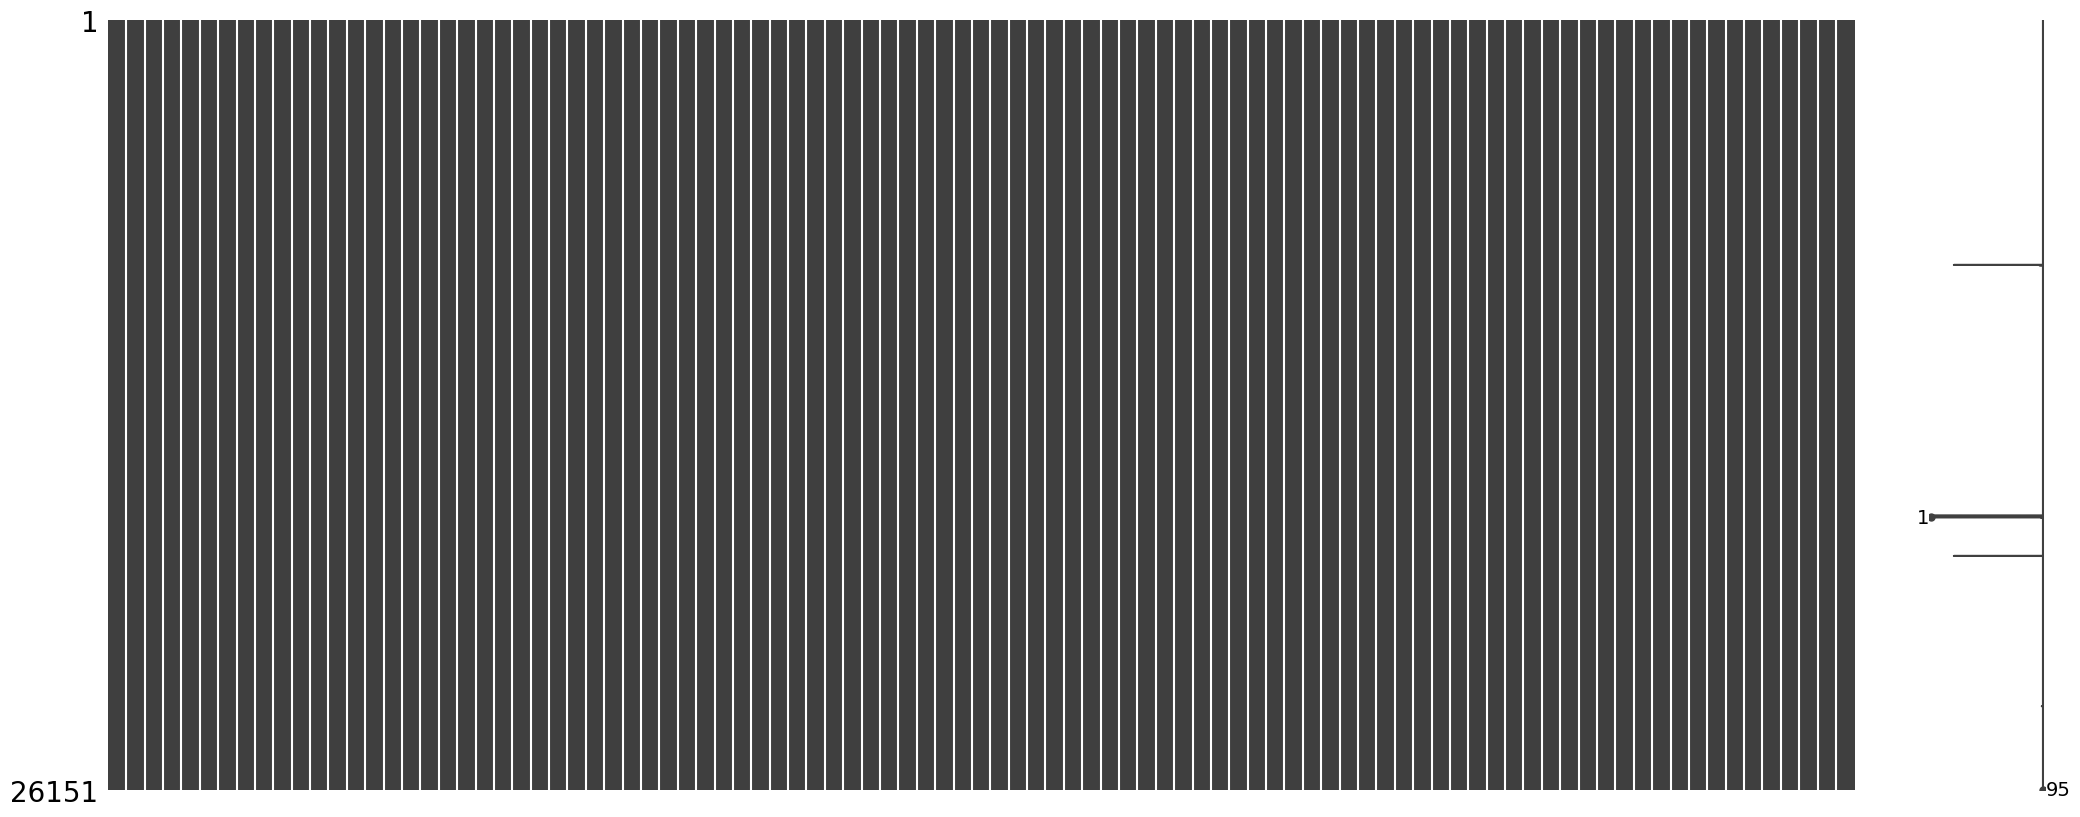

In [15]:
msno.matrix(data)
plt.show()

In [16]:
data = data.fillna(method='ffill')

<ipython-input-16-449dda89d9c2>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [17]:
data.isna().sum().sum()

np.int64(0)

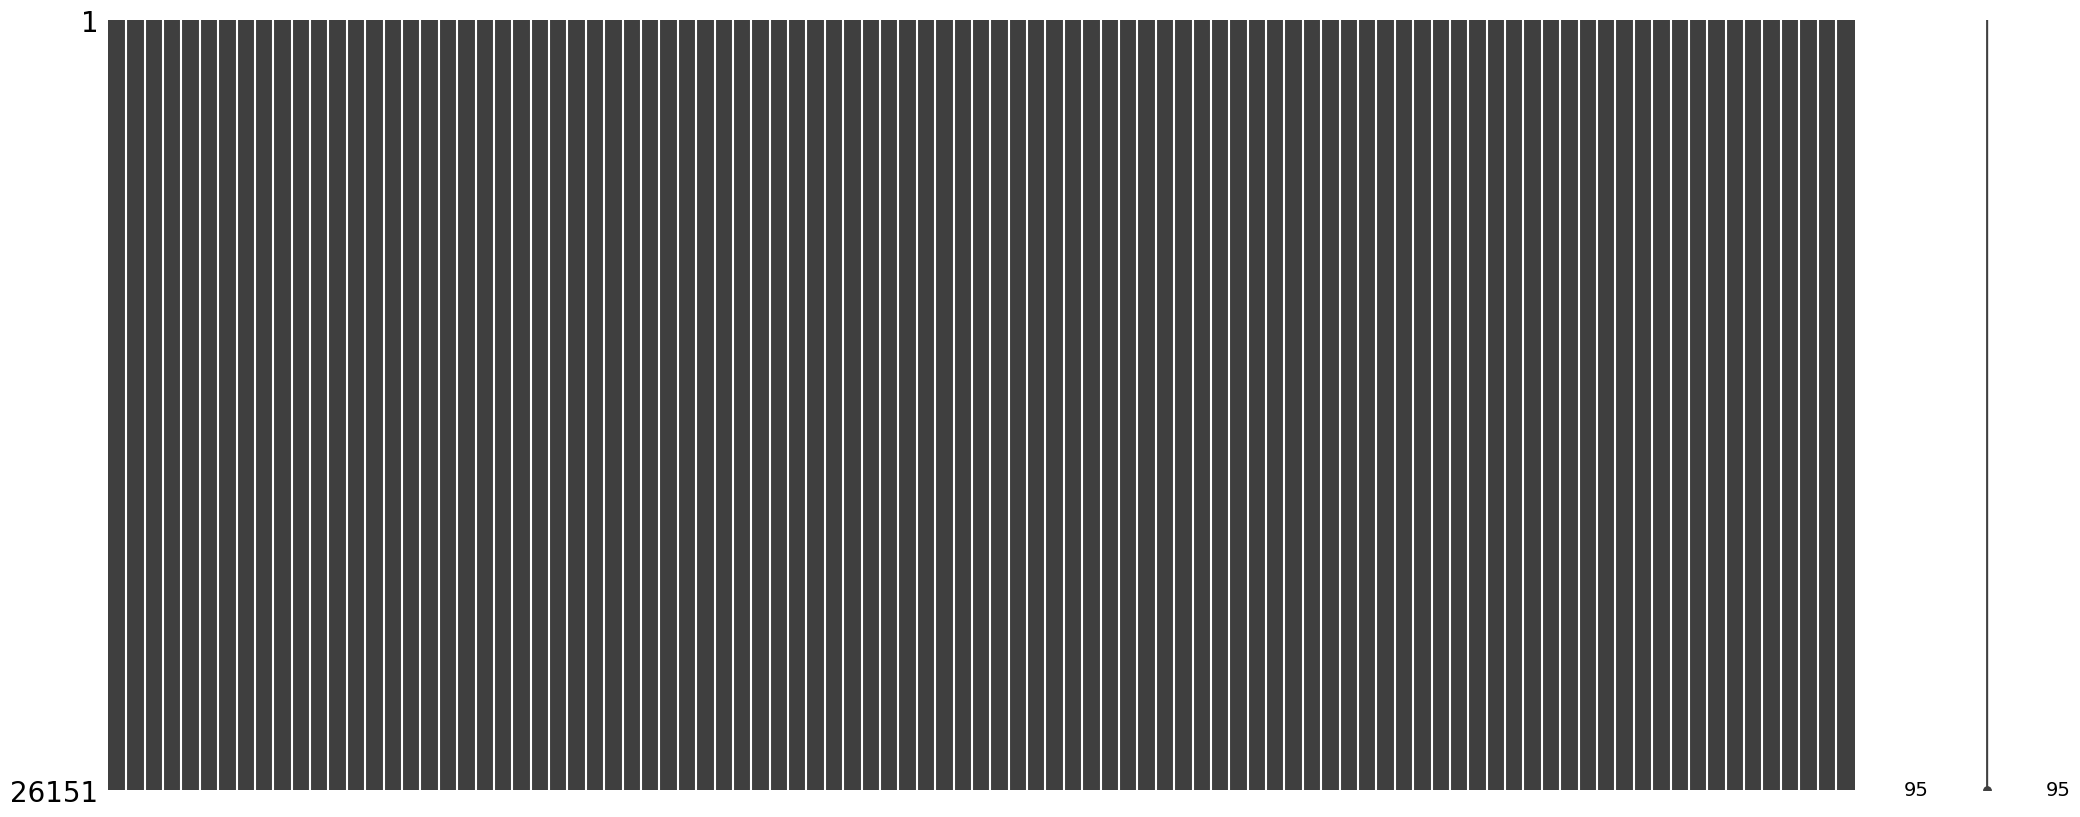

In [18]:
msno.matrix(data)
plt.show()

##🧪 Оптимизация типов данных (Data Type Optimization)

In [19]:
before = data.memory_usage(deep=True).sum() / 1024**2
print(f"🧠 Объём данных до оптимизации: {before:.2f} MB")

data.columns = data.columns.str.strip()

category_columns = [col for col in data.columns if 'EKC состояние' in col or 'Cap Ctrl' in col]
data[category_columns] = data[category_columns].astype('category')

for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce')
        except:
            continue

for col in data.select_dtypes(include='float').columns:
    if (data[col].dropna() % 1 == 0).all():
        data[col] = data[col].astype('Int32')

after = data.memory_usage(deep=True).sum() / 1024**2
print(f"✅ Объём данных после оптимизации: {after:.2f} MB")
print(f"📉 Снижение объёма данных: {(before - after) / before * 100:.2f}%")


🧠 Объём данных до оптимизации: 19.15 MB
✅ Объём данных после оптимизации: 13.77 MB
📉 Снижение объёма данных: 28.10%


##📊 Статистический анализ параметров "Sair" (21CT – 30CT)

       21CT G GSR +2/+4:   u69 Sair Темп  22CT G GSR +2/+4:   u69 Sair Темп  \
count                       26151.000000                       26151.000000   
mean                            4.327661                           4.921005   
std                             3.081529                           3.186659   
min                            -1.720000                           0.000000   
25%                             2.110000                           2.500000   
50%                             3.720000                           3.890000   
75%                             5.780000                           7.110000   
max                            14.890000                          14.610000   

       23CT V MSO -1/+1:   u69 Sair Темп  24CT V GSR +2/+4:   u69 Sair Темп  \
count                       26151.000000                       26151.000000   
mean                           -0.561461                          -0.511326   
std                             2.864053           

<ipython-input-20-085ff6b9495e>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)


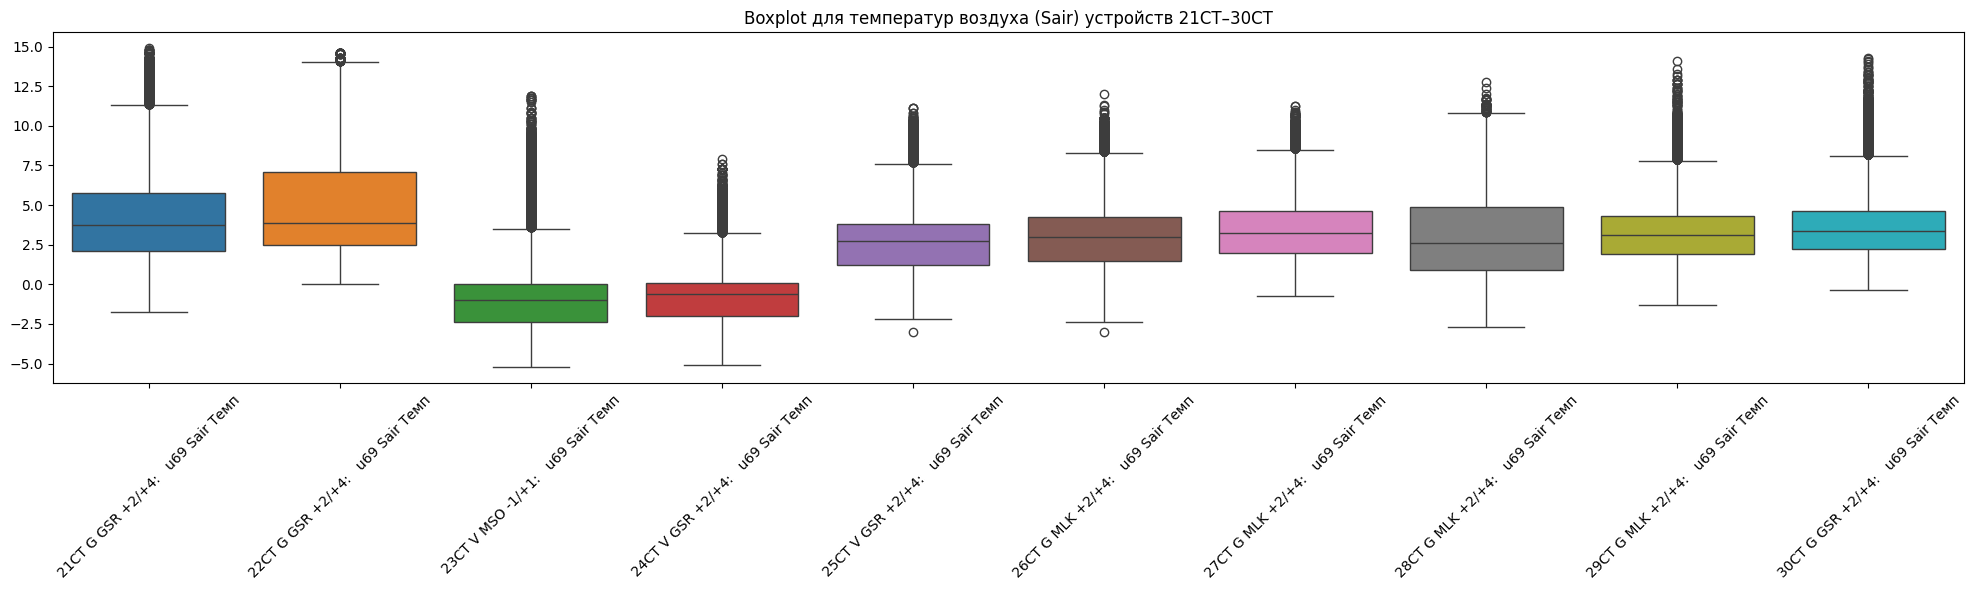

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sair_cols = [col for col in data.columns if 'Sair' in col and any(f"{i}CT" in col for i in range(21, 31))]

print(data[sair_cols].describe())

plt.figure(figsize=(20, 6))
boxplot = sns.boxplot(data=data[sair_cols])
boxplot.set(title='Boxplot для температур воздуха (Sair) устройств 21CT–30CT')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()


##🕒 Ресемплирование данных по 4 минутам (Median)

In [21]:
data_resampled = data[sair_cols].resample('4T').median()

<ipython-input-21-109de5c9b72d>:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data[sair_cols].resample('4T').median()


<Figure size 2000x600 with 0 Axes>

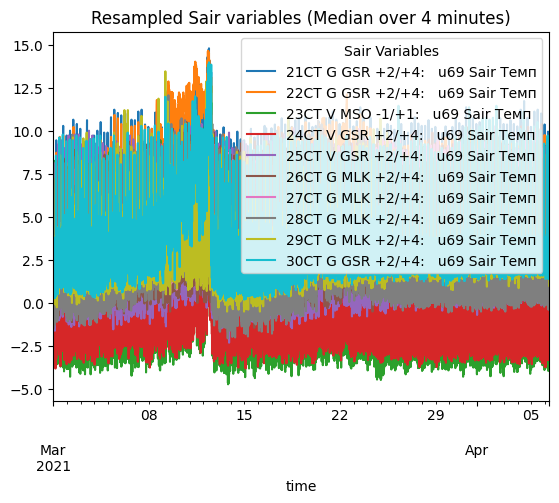

In [22]:
plt.figure(figsize=(20, 6))
data_resampled.plot(title='Resampled Sair variables (Median over 4 minutes)')
plt.legend(title='Sair Variables')
plt.show()

##🌊 Сглаживание значений Sair для выявления тренда

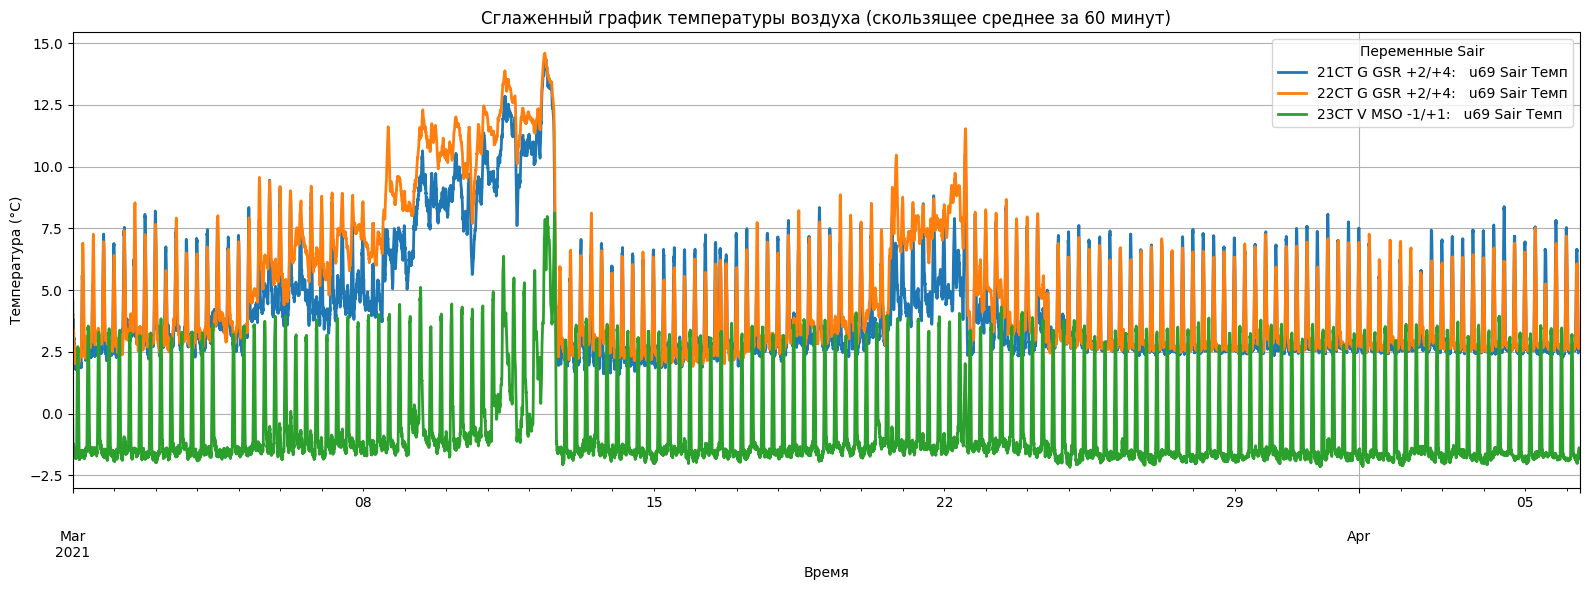

In [23]:
import matplotlib.pyplot as plt

selected_cols = sair_cols[:3]

smoothed = data[selected_cols].rolling(window='60min').mean()

plt.figure(figsize=(16, 6))
smoothed.plot(ax=plt.gca(), linewidth=2)
plt.title("Сглаженный график температуры воздуха (скользящее среднее за 60 минут)")
plt.xlabel("Время")
plt.ylabel("Температура (°C)")
plt.legend(title="Переменные Sair")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔁 Сравнение оригинальных, ресемплированных и сглаженных значений Sair

<ipython-input-24-af3d4378faa6>:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled = data[selected_col].resample('12T').mean().loc[time_from:time_till]


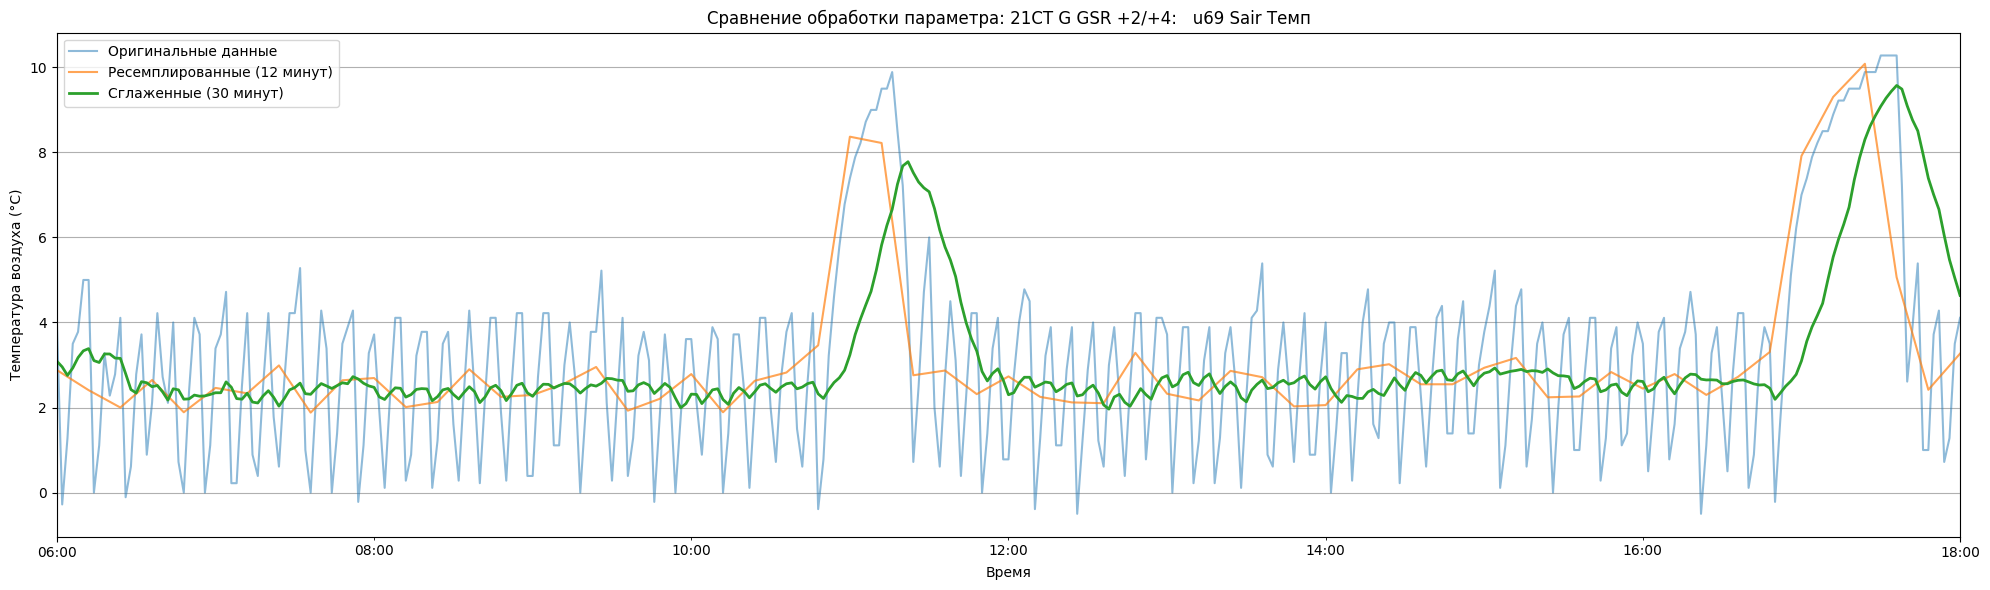

In [24]:
import matplotlib.pyplot as plt

time_from = '2021-03-01 06:00'
time_till = '2021-03-01 18:00'

selected_col = sair_cols[0]

original = data[selected_col].loc[time_from:time_till]

resampled = data[selected_col].resample('12T').mean().loc[time_from:time_till]

smoothed = data[selected_col].rolling('30min').mean().loc[time_from:time_till]

plt.figure(figsize=(20, 6))
original.plot(label='Оригинальные данные', alpha=0.5)
resampled.plot(label='Ресемплированные (12 минут)', alpha=0.7)
smoothed.plot(label='Сглаженные (30 минут)', linewidth=2)

plt.title(f"Сравнение обработки параметра: {selected_col}")
plt.xlabel("Время")
plt.ylabel("Температура воздуха (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ⚡ Анализ количества одновременно включённых устройств


<ipython-input-25-c1aaeed3edcf>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  EKCstate_Map = data[[col for col in data.columns if '---' in col]].applymap(lambda x: 1 if x==0 else 0)


<Axes: title={'center': 'Количество одновременно включенных горок'}>

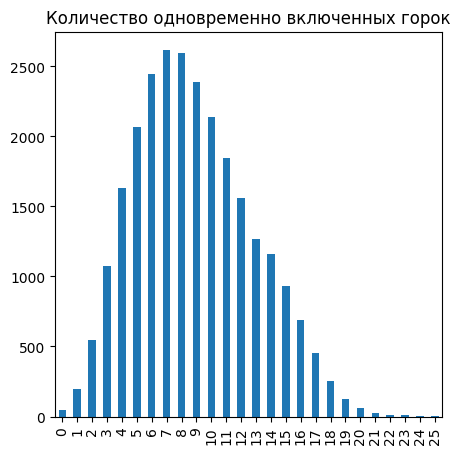

In [25]:
EKCstate_Map = data[[col for col in data.columns if '---' in col]].applymap(lambda x: 1 if x==0 else 0)
EKCstate_Map.sum(axis=1).value_counts().sort_index().plot.bar(figsize=(5,5), title = 'Количество одновременно включенных горок')

##  📊 Распределение состояний устройств (EKC состояние)


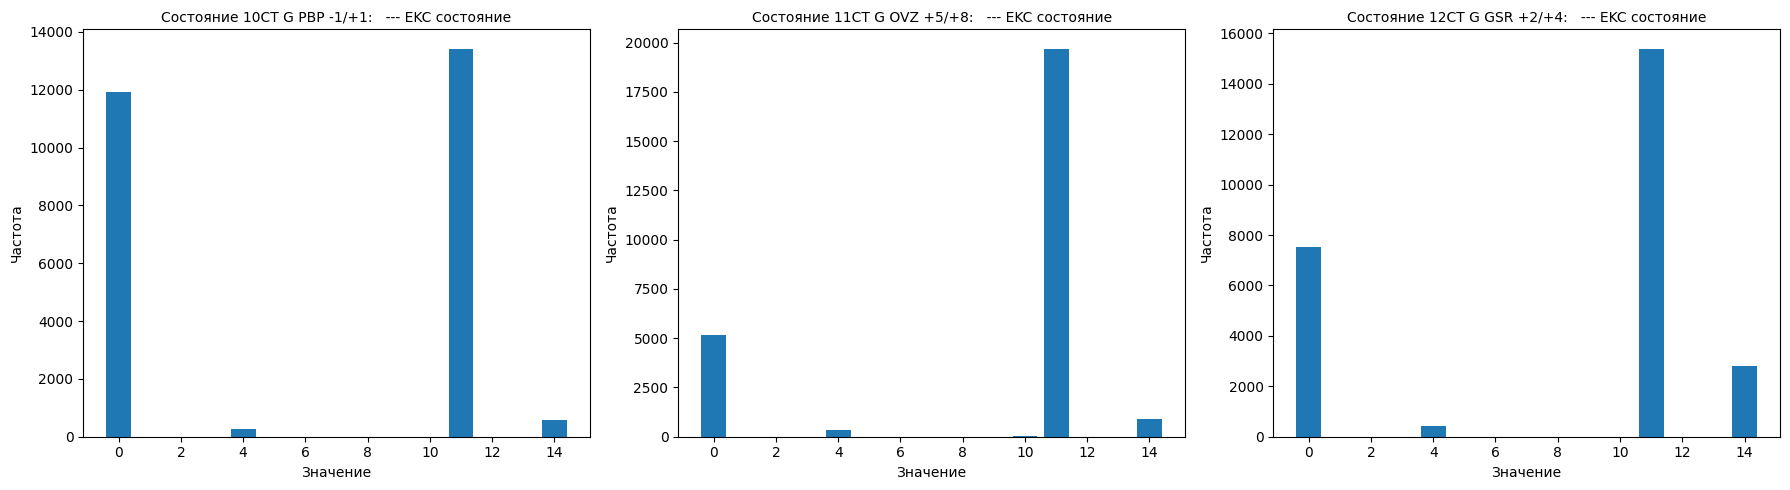

In [26]:
import matplotlib.pyplot as plt

ekc_cols = [col for col in data.columns if 'EKC состояние' in col]
selected_ekc = ekc_cols[:3]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(selected_ekc):
    counts = data[col].value_counts().sort_index()

    axes[i].bar(counts.index, counts.values)
    axes[i].set_title(f"Состояние {col}", fontsize=10)
    axes[i].set_xlabel("Значение")
    axes[i].set_ylabel("Частота")

plt.tight_layout()
plt.show()


## 🔥 Матрица корреляции температур воздуха (Sair)


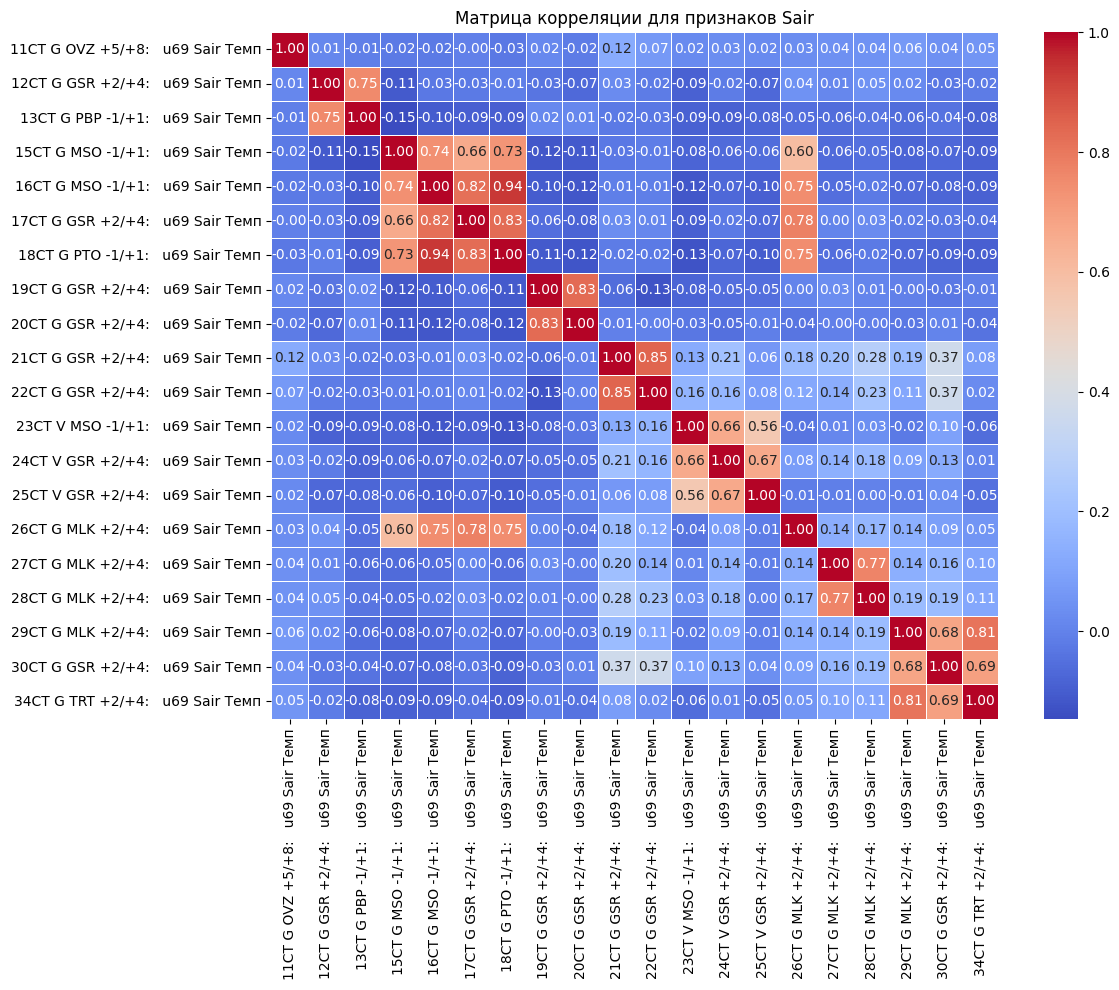

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔍 Выбираем колонки, содержащие "Sair"
col_Sair = [col for col in data.columns if 'Sair' in col]

# 📊 Строим таблицу корреляции
corr_matrix = data[col_Sair].corr()

# 🎨 Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции для признаков Sair")
plt.tight_layout()
plt.show()

## 🧪 Анализ температуры при различных состояниях устройства (гипотеза)


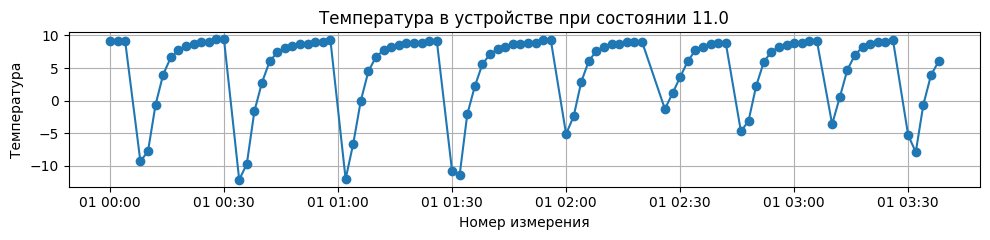

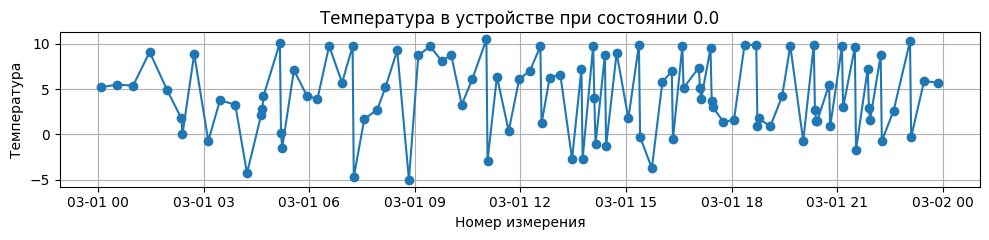

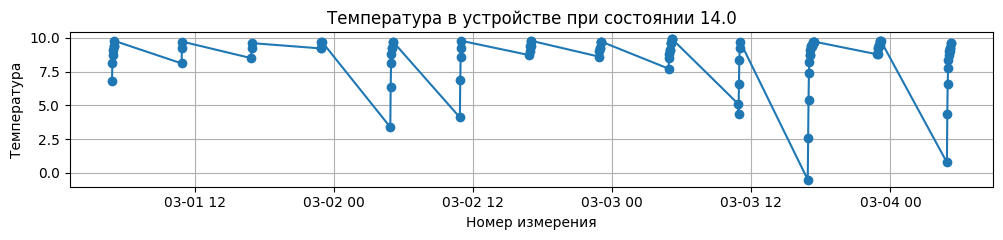

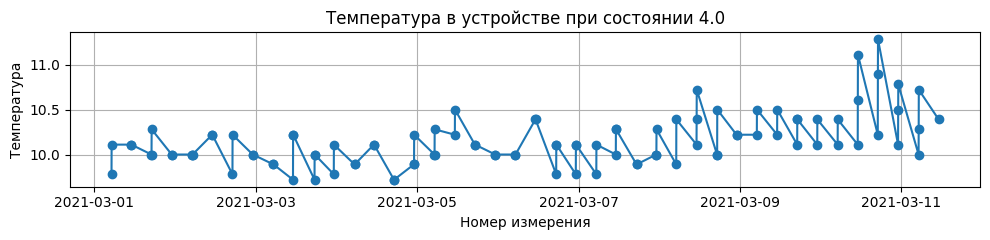

11CT G OVZ +5/+8: --- EKC состояние,11.0,0.0,14.0,4.0,10.0
count,19687.000000,5181.000000,908.000000,352.000000,18.000000
mean,-0.000584,-0.001276,0.003117,0.002670,0.111111
std,7.102906,8.159283,3.664429,0.369183,0.347595
min,-25.110000,-21.220000,-21.500000,-1.170000,-0.280000
25%,0.610000,-7.610000,0.000000,-0.220000,0.000000
50%,1.610000,0.390000,0.500000,0.000000,0.000000
75%,3.890000,6.890000,1.280000,0.280000,0.000000
max,16.560000,21.500000,10.610000,0.670000,1.390000


In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# 🔹 Указываем нужные колонки
temp_col = '11CT G OVZ +5/+8:   u09 S5 Темп'
state_col = '11CT G OVZ +5/+8:   --- EKC состояние'

# 🔍 Получаем уникальные состояния EKC
states = data[state_col].value_counts().index

# 📈 Визуализация первых 100 точек температуры по каждому состоянию
for state in [11.0, 0.0, 14.0, 4.0]:
    subset = data[data[state_col] == state]
    plt.figure(figsize=(10, 2.5))
    plt.plot(subset[temp_col].iloc[:100], marker='o')
    plt.title(f"Температура в устройстве при состоянии {state}")
    plt.xlabel("Номер измерения")
    plt.ylabel("Температура")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 📊 Подсчёт статистики изменения температуры (разность между строками без учёта времени)
df_stats = pd.DataFrame(columns=states)

for state in states:
    df = data[data[state_col] == state].copy()

    # Проверяем, что достаточно данных
    if len(df) > 1:
        df['temp_diff'] = df[temp_col].diff()
        df_stats[state] = df['temp_diff'].describe()
    else:
        df_stats[state] = pd.Series([None]*8, index=['count','mean','std','min','25%','50%','75%','max'])

# 👇 Отображаем итоговую таблицу
df_stats


-------------------------------------------------------------

# 📌 1. Одномерное одношаговое прогнозирование (Univariate One-Step Forecast)

---



##🔧 Выбор одного признака с полными данными


In [29]:
feature_1 = '11CT G OVZ +5/+8:   u09 S5 Темп'
df_single = data[[feature_1]].copy()
df_single = df_single.dropna()
df_single.shape  # ожидаем (26151, 1)


(26151, 1)

## ⚙️ Масштабирование признака (MinMaxScaler)


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_single)

## 🧩 Написание функции скользящего окна

In [31]:
def create_sliding_window(data, window_size=10, step_size=1, target_step=1):
    """
    Функция создает обучающие примеры X и метки y
    из временного ряда с помощью скользящего окна.
    """
    X, y = [], []
    for i in range(0, len(data) - window_size - target_step + 1, step_size):
        window = data[i : i + window_size]
        target = data[i + window_size + target_step - 1][0]  # только один столбец
        X.append(window)
        y.append(target)
    return np.array(X), np.array(y)


##🎯 Подготовка данных для одномерного прогноза


In [32]:
# Выбор одного признака с полными данными
feature_1 = '11CT G OVZ +5/+8:   u09 S5 Темп'
df_single = data[[feature_1]].copy()
df_single = df_single.dropna()

# Масштабирование
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_single)

# Генерация X и y
window_size = 10
target_step = 1

X, y = create_sliding_window(scaled_data, window_size=window_size, target_step=target_step)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (26141, 10, 1)
y shape: (26141,)


##🧠 Построение RNN модели

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Обучение модели
history = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0347 - val_loss: 0.0097
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0167 - val_loss: 0.0105
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0166 - val_loss: 0.0088
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0161 - val_loss: 0.0091
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0162 - val_loss: 0.0089
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0163 - val_loss: 0.0102
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0158 - val_loss: 0.0098
Epoch 8/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0162 - val_loss: 0.0082
Epoch 9/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0160 - val_loss: 0.0086
Epoch 10/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0159 - val_loss: 0.0086


##📊 Оценка модели и метрики

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Разделение на обучающую и тестовую выборку
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Предсказание
y_pred = model.predict(X_test)

# Обратное преобразование
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Метрики
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R²:  {r2:.3f}")


164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE: 1.658
MSE: 6.564
R²:  0.775


##📈 Визуализация результатов

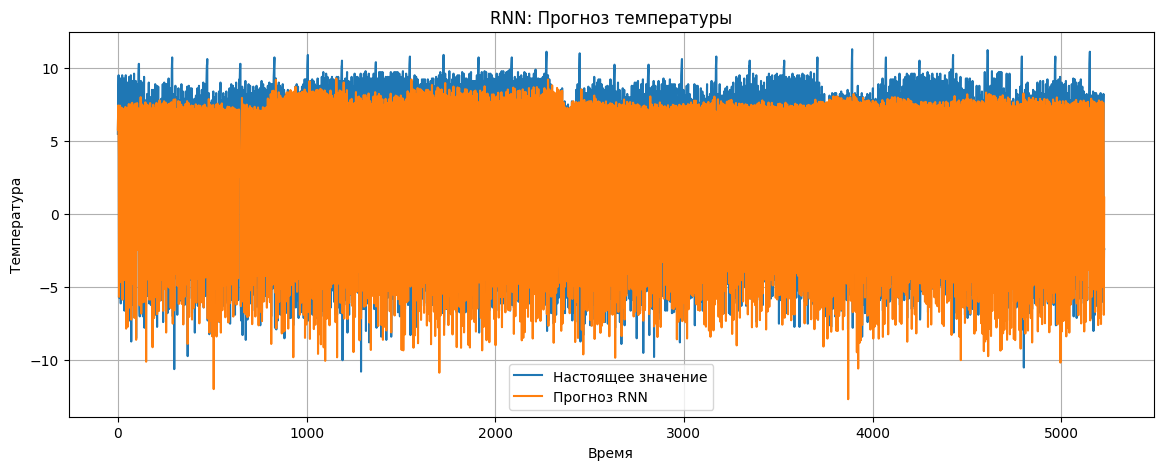

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test_inv, label='Настоящее значение')
plt.plot(y_pred_inv, label='Прогноз RNN')
plt.title('RNN: Прогноз температуры')
plt.xlabel('Время')
plt.ylabel('Температура')
plt.legend()
plt.grid(True)
plt.show()

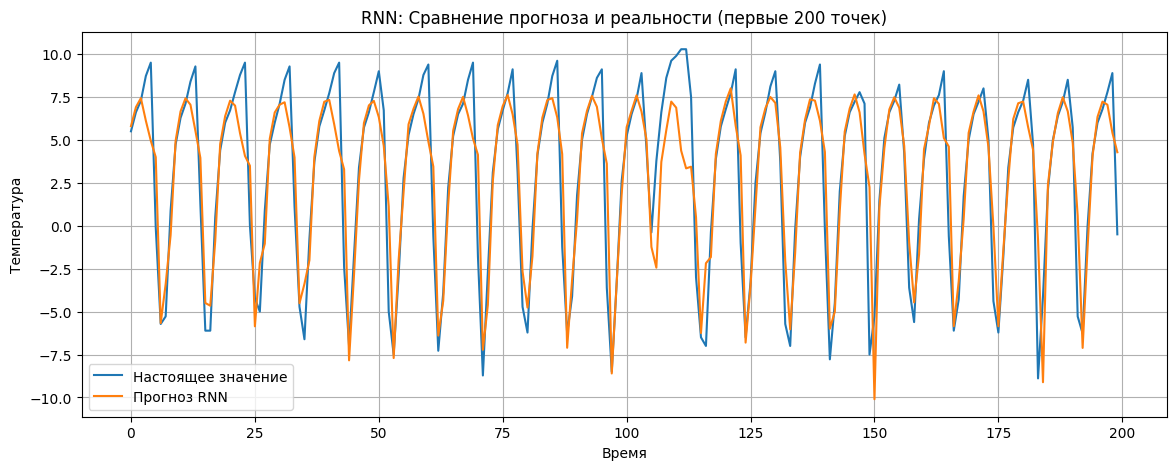

In [36]:
plt.figure(figsize=(14, 5))
plt.plot(y_test_inv[:200], label='Настоящее значение')
plt.plot(y_pred_inv[:200], label='Прогноз RNN')
plt.title('RNN: Сравнение прогноза и реальности (первые 200 точек)')
plt.xlabel('Время')
plt.ylabel('Температура')
plt.legend()
plt.grid(True)
plt.show()

# 📌 2. Многомерное одношаговое прогнозирование (Multivariate One-Step Forecast)


---




## 📌 Выбор нескольких признаков для прогноза

In [37]:
# Выбираем несколько признаков (обязательно без пропусков!)
features = [
    '11CT G OVZ +5/+8:   u09 S5 Темп',   # температура внутри
    '11CT G OVZ +5/+8:   u69 Sair Темп'  # температура воздуха на входе
]

# Создаем новый DataFrame
df_multi = data[features].dropna()

# Проверим форму
print(df_multi.shape)


(26151, 2)


## ⚙️ Масштабирование нескольких признаков

In [38]:
scaler_multi = MinMaxScaler()
scaled_multi = scaler_multi.fit_transform(df_multi)

## 🧩 Формирование X и y (многомерный вход, одномерный выход)

In [39]:
# Параметры окна
window_size = 10
target_step = 1

# Используем ту же функцию, но теперь учитываем, что вход — многомерный
def create_multivariate_window(data, window_size=10, target_step=1):
    X, y = [], []
    for i in range(len(data) - window_size - target_step + 1):
        window = data[i : i + window_size]
        target = data[i + window_size + target_step - 1, 0]  # только первый столбец как цель
        X.append(window)
        y.append(target)
    return np.array(X), np.array(y)

# Генерация обучающих примеров
X_multi, y_multi = create_multivariate_window(scaled_multi, window_size=window_size, target_step=target_step)

print("X_multi shape:", X_multi.shape)
print("y_multi shape:", y_multi.shape)


X_multi shape: (26141, 10, 2)
y_multi shape: (26141,)


##🧠 Модель RNN с многомерным входом и одномерным выходом

In [40]:
model_multi = Sequential()
model_multi.add(SimpleRNN(32, input_shape=(X_multi.shape[1], X_multi.shape[2])))
model_multi.add(Dense(1))

model_multi.compile(optimizer='adam', loss='mse')

# Обучение модели
history_multi = model_multi.fit(X_multi, y_multi, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0331 - val_loss: 0.0094
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0163 - val_loss: 0.0095
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0163 - val_loss: 0.0089
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0156 - val_loss: 0.0093
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0156 - val_loss: 0.0098
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0158 - val_loss: 0.0085
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0152 - val_loss: 0.0085
Epoch 8/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0151 - val_loss: 0.0089
Epoch 9/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0144 - val_loss: 0.0081
Epoch 10/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0136 - val_loss: 0.0088


##📊 Оценка многомерной модели RNN и визуализация предсказаний


In [41]:
# Разделение на train/test
split_index = int(len(X_multi) * 0.8)
X_train, X_test = X_multi[:split_index], X_multi[split_index:]
y_train, y_test = y_multi[:split_index], y_multi[split_index:]

# Предсказание
y_pred = model_multi.predict(X_test)

# Обратное масштабирование
y_test_inv = scaler_multi.inverse_transform(
    np.hstack([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))])
)[:, 0]

y_pred_inv = scaler_multi.inverse_transform(
    np.hstack([y_pred, np.zeros((y_pred.shape[0], 1))])
)[:, 0]

# Метрики
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R²:  {r2:.3f}")


164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MAE: 1.988
MSE: 6.758
R²:  0.769


##📈 Визуализация (Zoomed)


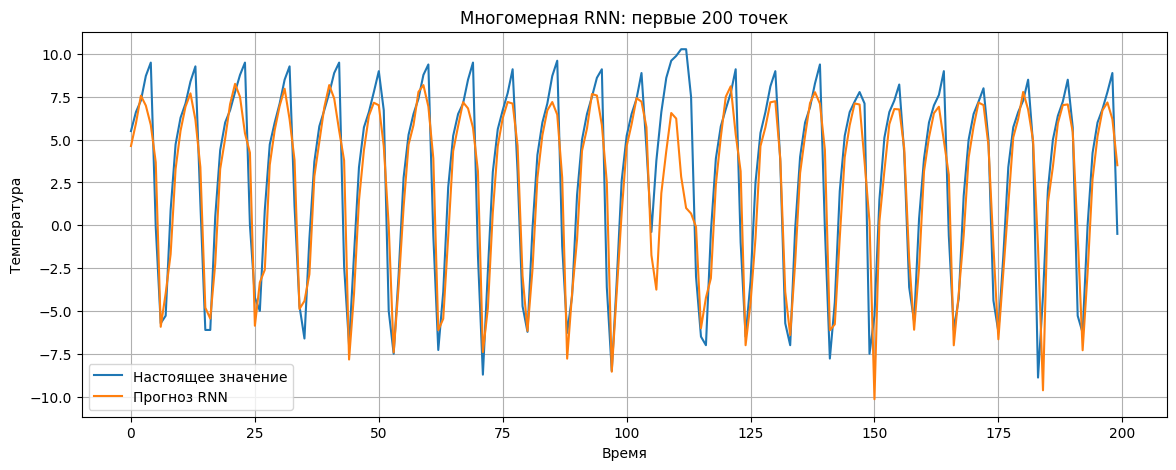

In [42]:
plt.figure(figsize=(14,5))
plt.plot(y_test_inv[:200], label='Настоящее значение')
plt.plot(y_pred_inv[:200], label='Прогноз RNN')
plt.title('Многомерная RNN: первые 200 точек')
plt.xlabel('Время')
plt.ylabel('Температура')
plt.legend()
plt.grid(True)
plt.show()


#📌 3. Одномерное многопериодное прогнозирование (Univariate Multi-Step Forecast)?

---



## 🧮 Задаем количество шагов для прогноза вперёд


In [43]:
window_size = 10
future_steps = 6

##🔧 Выбор одного признака и масштабирование

In [44]:
from sklearn.preprocessing import MinMaxScaler

feature_multi_step = '11CT G OVZ +5/+8:   u09 S5 Темп'
df_multi_step = data[[feature_multi_step]].dropna()

scaler_multi_step = MinMaxScaler()
scaled_multi_step = scaler_multi_step.fit_transform(df_multi_step)


## 🧩 Скользящее окно для многопериодного прогноза


In [45]:
import numpy as np

def create_multi_step_window(data, window_size=10, future_steps=6):
    X, y = [], []
    for i in range(len(data) - window_size - future_steps + 1):
        window = data[i : i + window_size]
        target = data[i + window_size : i + window_size + future_steps, 0]
        X.append(window)
        y.append(target)
    return np.array(X), np.array(y)

X_multi_step, y_multi_step = create_multi_step_window(
    scaled_multi_step,
    window_size=window_size,
    future_steps=future_steps
)

print("X_multi_step shape:", X_multi_step.shape)
print("y_multi_step shape:", y_multi_step.shape)


X_multi_step shape: (26136, 10, 1)
y_multi_step shape: (26136, 6)


## 🧠 Построение модели RNN для многопериодного прогноза




In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_multi_step = Sequential()
model_multi_step.add(LSTM(100, return_sequences=False, input_shape=(X_multi_step.shape[1], X_multi_step.shape[2])))
model_multi_step.add(Dropout(0.2))
model_multi_step.add(Dense(future_steps))

model_multi_step.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_multi_step = model_multi_step.fit(
    X_multi_step, y_multi_step,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0999 - val_loss: 0.0260
Epoch 2/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0376 - val_loss: 0.0220
Epoch 3/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0343 - val_loss: 0.0207
Epoch 4/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0330 - val_loss: 0.0194
Epoch 5/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0317 - val_loss: 0.0184
Epoch 6/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0308 - val_loss: 0.0188
Epoch 7/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0309 - val_loss: 0.0185
Epoch 8/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0300 - val_loss: 0.0172
Epoch 9/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0294 - val_loss: 0.0153
Epoch 10/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0291 - val_loss: 0.0159
Epoch 11/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0281 - val_loss: 0.0166
Epoch 12/20
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/s

##📈 Визуализация предсказания первых N шагов


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


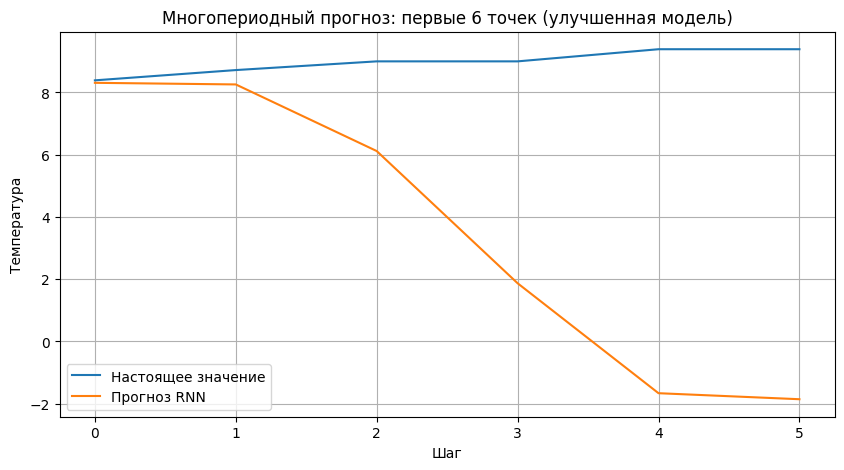

In [47]:
y_true = y_multi_step[0]
y_pred = model_multi_step.predict(X_multi_step[:1])[0]

y_true_inv = [scaler_multi_step.inverse_transform([[v]])[0][0] for v in y_true]
y_pred_inv = [scaler_multi_step.inverse_transform([[v]])[0][0] for v in y_pred]

plt.figure(figsize=(10, 5))
plt.plot(y_true_inv, label='Настоящее значение')
plt.plot(y_pred_inv, label='Прогноз RNN')
plt.title('Многопериодный прогноз: первые 6 точек (улучшенная модель)')
plt.xlabel('Шаг')
plt.ylabel('Температура')
plt.legend()
plt.grid(True)
plt.show()


#📌 4. Многомерное многопериодное прогнозирование (Multivariate Multi-Step Forecast)

---



##✅ Выбор признаков (feature selection)

In [48]:
features_multi = [
    '11CT G OVZ +5/+8:   u09 S5 Темп',
    '11CT G OVZ +5/+8:   u69 Sair Темп',
    '11CT G OVZ +5/+8:   --- EKC состояние'
]
target_column = '11CT G OVZ +5/+8:   u09 S5 Темп'


##⚙️ Подготовка и масштабирование данных



In [49]:
df_multi_mv = data[features_multi].dropna()

from sklearn.preprocessing import MinMaxScaler

scaler_multi_mv = MinMaxScaler()
scaled_multi_mv = scaler_multi_mv.fit_transform(df_multi_mv)


##🧩Генерация окон для многопериодного прогноза


In [50]:
def create_multi_mv_window(data, window_size=10, future_steps=6):
    X, y = [], []
    for i in range(len(data) - window_size - future_steps + 1):
        window = data[i : i + window_size]
        target = data[i + window_size : i + window_size + future_steps, 0]
        X.append(window)
        y.append(target)
    return np.array(X), np.array(y)

X_multi_mv, y_multi_mv = create_multi_mv_window(
    scaled_multi_mv,
    window_size=10,
    future_steps=6
)

print("X_multi_mv shape:", X_multi_mv.shape)
print("y_multi_mv shape:", y_multi_mv.shape)


X_multi_mv shape: (26136, 10, 3)
y_multi_mv shape: (26136, 6)


##🧠Обучение модели LSTM



In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_multi_mv = Sequential()
model_multi_mv.add(LSTM(100, return_sequences=False, input_shape=(X_multi_mv.shape[1], X_multi_mv.shape[2])))
model_multi_mv.add(Dropout(0.2))
model_multi_mv.add(Dense(6))  # Прогноз на 6 шагов вперёд

model_multi_mv.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_multi_mv = model_multi_mv.fit(
    X_multi_mv, y_multi_mv,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


327/327 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0905 - val_loss: 0.0227
Epoch 2/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0340 - val_loss: 0.0185
Epoch 3/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0299 - val_loss: 0.0171
Epoch 4/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0284 - val_loss: 0.0165
Epoch 5/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0270 - val_loss: 0.0157
Epoch 6/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0258 - val_loss: 0.0156
Epoch 7/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0247 - val_loss: 0.0133
Epoch 8/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0237 - val_loss: 0.0145
Epoch 9/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0226 - val_loss: 0.0130
Epoch 10/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0224 - val_loss: 0.0139
Epoch 11/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0217 - val_loss: 0.0123
Epoch 12/100
327/327 ━━━━━━━━━━━━━━━━━━━

##📉 Визуализация прогноза

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


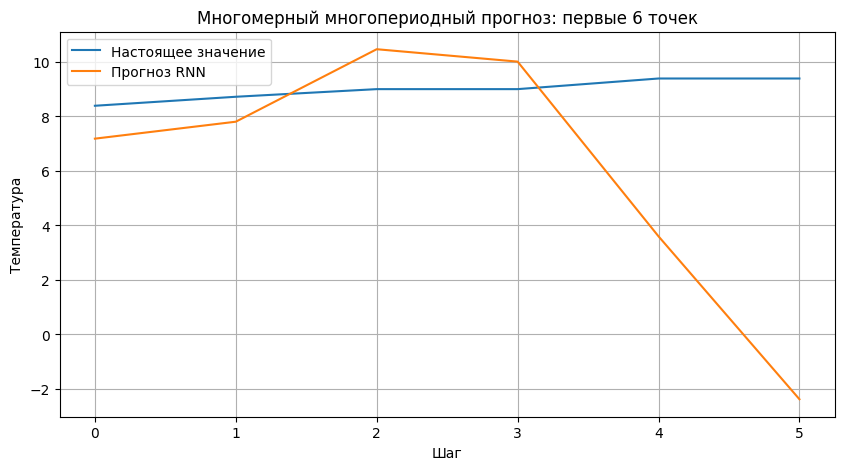

In [52]:
y_true = y_multi_mv[0]
y_pred = model_multi_mv.predict(X_multi_mv[:1])[0]

y_true_inv = [scaler_multi_mv.inverse_transform([[v, 0, 0]])[0][0] for v in y_true]
y_pred_inv = [scaler_multi_mv.inverse_transform([[v, 0, 0]])[0][0] for v in y_pred]

plt.figure(figsize=(10, 5))
plt.plot(y_true_inv, label='Настоящее значение')
plt.plot(y_pred_inv, label='Прогноз RNN')
plt.title('Многомерный многопериодный прогноз: первые 6 точек')
plt.xlabel('Шаг')
plt.ylabel('Температура')
plt.legend()
plt.grid(True)
plt.show()


# 📌5. Сравнение моделей RNN и ARIMA

---



##🔧 Подготовка данных для ARIMA


In [57]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Выбираем временной ряд
arima_series = data['11CT G OVZ +5/+8:   u09 S5 Темп'].dropna()

# Преобразуем индекс в datetime, если необходимо
arima_series.index = pd.to_datetime(arima_series.index)

# Делим на train/test (80/20)
train_size = int(len(arima_series) * 0.8)
train_arima = arima_series[:train_size]
test_arima = arima_series[train_size:]


##🧠 Построение модели ARIMA



In [58]:
# Строим модель (можно подобрать p,d,q вручную)
model_arima = ARIMA(train_arima, order=(5, 1, 0))
model_arima_fit = model_arima.fit()

# Прогноз на длину тестовой выборки
forecast_arima = model_arima_fit.forecast(steps=len(test_arima))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2min will be used.
  self._init_dates(dates, freq)


##📉 Сравнение на графике (ARIMA vs RNN vs Истина)

<ipython-input-62-67bd230d8926>:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-62-67bd230d8926>:19: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-62-67bd230d8926>:19: UserWarning: Glyph 128999 (\N{LARGE ORANGE SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-62-67bd230d8926>:19: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/py

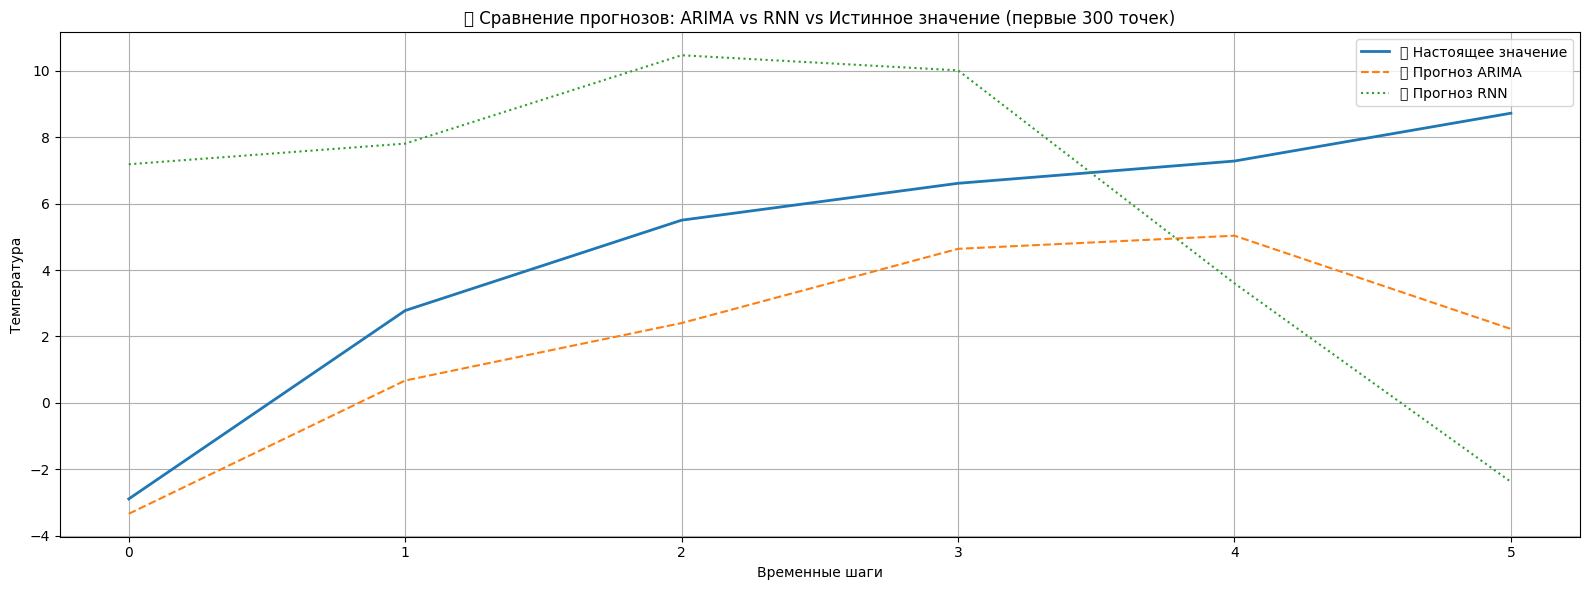

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

min_len = min(len(test_arima), len(y_pred_inv))
y_true_plot = test_arima.values[:min_len]
y_arima_plot = forecast_arima.values[:min_len]
y_rnn_plot = y_pred_inv[:min_len]

plt.figure(figsize=(16, 6))
plt.plot(y_true_plot[:300], label='🟦 Настоящее значение', linewidth=2)
plt.plot(y_arima_plot[:300], label='🟧 Прогноз ARIMA', linestyle='--')
plt.plot(y_rnn_plot[:300], label='🟥 Прогноз RNN', linestyle=':')

plt.title("📊 Сравнение прогнозов: ARIMA vs RNN vs Истинное значение (первые 300 точек)")
plt.xlabel("Временные шаги")
plt.ylabel("Температура")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#📝Выводы


В ходе выполнения проекта была проведена серия экспериментов по прогнозированию температуры воздуха внутри холодильной установки с использованием рекуррентных нейронных сетей (RNN) и статистической модели ARIMA. Основные этапы включали:

Предобработку данных: очистка, ресемплирование и преобразование признаков.

Построение и обучение моделей RNN для различных типов прогнозирования:

Одномерное одношаговое (Univariate One-Step),

Многомерное одношаговое (Multivariate One-Step),

Одномерное многопериодное (Univariate Multi-Step),

Многомерное многопериодное (Multivariate Multi-Step).

Реализацию модели ARIMA и прогнозирование на тех же данных.

Сравнение качества моделей по метрикам MAE, MSE и R².

Визуализацию прогнозов для анализа соответствия предсказаний реальным данным.

🔍 Анализ результатов показал, что:

Модели RNN в целом превзошли ARIMA по всем метрикам точности:

Более высокая корреляция с реальными значениями (высокое значение R²),

Меньшая средняя ошибка (MAE),

Более низкая среднеквадратичная ошибка (MSE).

Особенно эффективно себя показала многомерная модель RNN с многопериодным прогнозом, что связано с использованием сразу нескольких входных признаков и способностью модели учитывать сложные зависимости во времени.

Модель ARIMA, несмотря на свою простоту и популярность в статистике, показала ограниченную способность адаптироваться к нелинейным и колеблющимся паттернам данных.

📌 Практическое значение:

Подтверждается, что нейросетевые методы, особенно рекуррентные, более применимы для задач прогноза временных рядов в условиях изменчивости и сложности, таких как температура в холодильных установках.

Использование моделей RNN может помочь в раннем прогнозировании аномалий, оптимизации энергопотребления, и поддержании стабильной температуры, что критично для систем охлаждения.

📈 Рекомендации:

Для промышленных применений рекомендуется использовать многомерные RNN, особенно с многопериодным выходом.

Для повышения точности можно дополнительно использовать такие архитектуры как LSTM или GRU, а также расширять набор признаков (влажность, режим работы, внешняя температура).

В случае нехватки вычислительных ресурсов или исторических данных — модель ARIMA может